In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [3]:
# импорт нармализатора и делителя выборки
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["rezult"] # отбираем столбец с откликами

In [5]:
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [6]:
#Масштабируем тренинговую и тестовую выборки - иначе наш LogReg не заработает
scaler = StandardScaler()  # воспользуемся стандартным трансформером для масштабирования

# масштабируем обучающую выборку
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку, используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [7]:
# импортируем метод логистической регрессии
from sklearn.linear_model import LogisticRegression 

reg = LogisticRegression(random_state=42, solver='lbfgs').fit(X_train_scaled, y_train)

In [8]:
#предсказание с помощью обученной модели
Y_pred = reg.predict(X_test_scaled)

In [9]:
#ищем вероятности отнесения к 0 и 1 классу объектов тестовых данных 
y_pred_proba = reg.predict_proba(X_test_scaled)[:,1]

In [15]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics

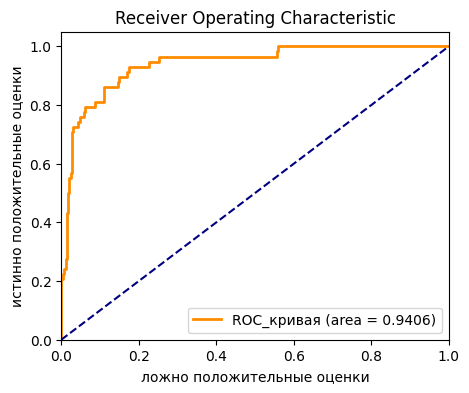

In [17]:
# Расчет ROC кривой
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Построение ROC кривой
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC_кривая (area = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('ложно положительные оценки')
plt.ylabel('истинно положительные оценки')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
print('Точность предсказаний:',metrics.accuracy_score(Y_pred, y_test))
print('Количество предсказанных верно из 499:', metrics.accuracy_score(Y_pred, y_test, normalize=False))
a1= metrics.accuracy_score(Y_pred, y_test)

Точность предсказаний: 0.9238476953907816
Количество предсказанных верно из 499: 461


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, Y_pred)
print('Матрица ошибок:')
print(conf_matrix)

Матрица ошибок:
[[433   8]
 [ 30  28]]


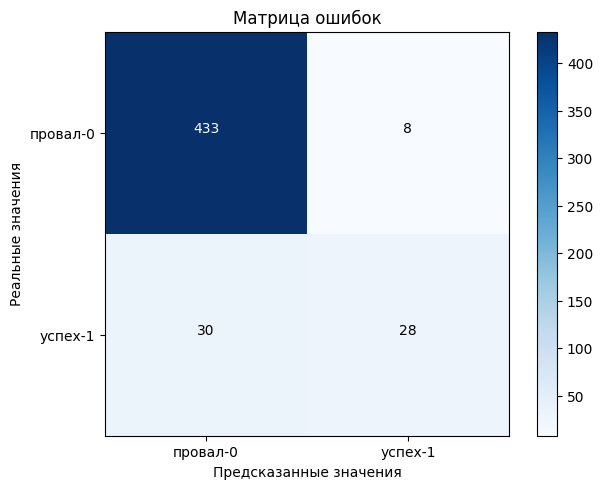

In [20]:
#сделаем картинку красивой
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Создаем матрицу ошибок
confusion_matrix = np.array([[433,  8],
                            [30, 28 ]])

# Создаем список меток классов
labels = ["провал-0", "успех-1"]

# Отображение матрицы ошибок
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Добавляем метки осей
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Добавляем числа в ячейки
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Делаем красивые настройки
plt.tight_layout()
plt.ylabel("Реальные значения")
plt.xlabel("Предсказанные значения")
plt.show()

In [21]:
# Отчет о классификации
class_report = classification_report(y_test, Y_pred, digits=4)
print('Отчет о классификации:')
print(class_report)

Отчет о классификации:
              precision    recall  f1-score   support

           0     0.9352    0.9819    0.9580       441
           1     0.7778    0.4828    0.5957        58

    accuracy                         0.9238       499
   macro avg     0.8565    0.7323    0.7769       499
weighted avg     0.9169    0.9238    0.9159       499

